# A/B Testing


#### Objective: To help boost revenue for a big online store by conducting and analyzing an A/B test 


### Data Description

Data used in the first part of the project
***/datasets/hypotheses_us.csv*** 

    Hypotheses — brief descriptions of the hypotheses
    Reach — user reach, on a scale of one to ten
    Impact — impact on users, on a scale of one to ten
    Confidence — confidence in the hypothesis, on a scale of one to ten
    Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.
    
Data used in the second part of the project
(Orders table
***/datasets/orders_us.csv***)

    transactionId — order identifier
    visitorId — identifier of the user who placed the order
    date — of the order
    revenue — from the order
    group — the A/B test group that the user belongs to

(Visits table
***/datasets/visits_us.csv***)

    date — date
    group — A/B test group
    visits — the number of visits on the date specified in the A/B test group specified

## Import data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from scipy import stats as st
from io import BytesIO
import requests


In [2]:
spreadsheet_id = '143vPyy2Oxkhw0SNbrH2llAn-FUoDZUoUxC2NiW1dVpY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
hypotheses = pd.read_csv(BytesIO(r.content))

spreadsheet_id = '1kCcyk7nnr3dlXzxlZEuM2rwhYgi6pkhnwrulOeoSKgQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content))

spreadsheet_id = '1jK0jwBfbhTQY5BxpnVU1O_5g586j7Ea2ophC8ilT8xs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visits = pd.read_csv(BytesIO(r.content))
 

In [3]:
display(hypotheses.info())
display(hypotheses.describe())
display(hypotheses.sample())
display(hypotheses.head())
pd.set_option('display.max_colwidth', -1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,Hypothesis,Reach,Impact,Confidence,Effort
7,Add a subscription form to all the main pages....,10,7,8,5


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


> First look, we can see that there are columns that we need to change the data type. It will help our data to be more readable and helps the data load faster. We do not need to make changes with the **hypotheses** data since it's a short dataframe but we do need to make slight changes with the orders and visits dataframe. First, we need to look at our first data set and do some calculations.

## Part 1. Prioritizing Hypotheses

In [4]:
#Change columns to lowercase
hypotheses.columns = hypotheses.columns.str.lower()

> To prioritize hypotheses, we're going to be using:
> - **ICE** - Impact, Confidence, Ease
> - **RICE** - Reach, Impact, Confidence, Ease
> - Reach - how many users will be affected 
> - Impact - how it will affect the users and their experiecnce
> - Confidence - how sure you are that the product will affect them
> - Effort - how much it will cost to test the hypothesis

##### Task 1. Apply the ICE framework to prioritize hypotheses

In [5]:
hypotheses['ice']= hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
hypotheses= hypotheses.round(2).sort_values(by='ice', ascending=False)
hypotheses


,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


> According to Ice, we should prioritize ***hypothesis 8***, which is launching a promotion that gives discounts with a high level of Impact and Confidence and median level of Effort. This was followed by hypotheses ***0 and 7***,both have high level of Impact and Confidence and median level of Effort.

##### Task 2 . Apply the RICE framework to prioritize hypotheses

In [6]:
hypotheses['rice'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
hypotheses = hypotheses.round(2).sort_values(by='rice', ascending=False)
hypotheses

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


> According to ***RICE***, we should prioritize ***hypothesis 7*** with adding a subscription which has high level of Reach, Impact and Confidence with median level Effort. This was followed by ***hypotheses 2*** with adding product recommendation which has a high level of Reach and Confidence and not a lot of Effort needed but the impact is not as strong as hypothesis 7. ***Hypothesis 0*** comes in third with adding two new channels for attracting traffic, which has a high level of Impact and Confidence, median level effort but the Reach is really low. 

##### Task 3.  Changes between the ICE and RICE

In [7]:
#Calculating the changes between the two
hypotheses['change'] = hypotheses['rice'].rank() - hypotheses['ice'].rank()
hypotheses[['hypothesis','ice','rice','change']]

,hypothesis,ice,rice,change
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20,112.0,2.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00,56.0,3.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33,40.0,-1.5
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00,40.0,0.5
8,Launch a promotion that gives users discounts on their birthdays,16.20,16.2,-4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12,9.0,2.0
1,Launch your own delivery service. This will shorten delivery time,2.00,4.0,-1.5
5,Add a customer review page. This will increase the number of orders,1.33,4.0,-0.5
4,Change the background color on the main page. This will increase user engagement,1.00,3.0,0.0


In [8]:
hypotheses['ice_priority'] = 10 - hypotheses['ice'].rank()
hypotheses['rice_priority'] = 10 - hypotheses['rice'].rank()

hypotheses[['hypothesis','ice','ice_priority','rice','rice_priority','change']].sort_values(by='rice', ascending=False)

,hypothesis,ice,ice_priority,rice,rice_priority,change
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20,3.0,112.0,1.0,2.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00,5.0,56.0,2.0,3.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33,2.0,40.0,3.5,-1.5
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00,4.0,40.0,3.5,0.5
8,Launch a promotion that gives users discounts on their birthdays,16.20,1.0,16.2,5.0,-4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12,8.0,9.0,6.0,2.0
1,Launch your own delivery service. This will shorten delivery time,2.00,6.0,4.0,7.5,-1.5
5,Add a customer review page. This will increase the number of orders,1.33,7.0,4.0,7.5,-0.5
4,Change the background color on the main page. This will increase user engagement,1.00,9.0,3.0,9.0,0.0


##### Conclusion

The top priority for each framework:
- RICE - hypothesis 7- adding a subscription form should be prioritized - highest reach score
- ICE - hypothesis 8 - launching birthday discounts should be prioritized - lowest reach score

***Hypothesis 7*** (adding a subscription) and ***hypothesis 2*** (adding product recommendation blocks) moved up mainly because they have a broader reach than the other hypotheses. ***Hypothesis 8*** (launch birthday discounts promotion) which was the top one under Ice framework,sunk to fifth place due to small reach.  This makes sense since it can only be used once a year for each user. The difference between ICE and RICE frameworks is the reach parameter. This parameter adds another factor to the framework, making RICE scores higher than ICE scores. Reach is an important factor to consider. Adding a subscription had been very consistent with high level of reach, impact and confidence with a median level of effort.



## Import second data and preprocessing

#### Orders

In [9]:
display(orders.info())
display(orders.describe())
display(orders.sample())
display(orders.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,transactionId,visitorId,date,revenue,group
333,968111463,458253749,8/25/2019,15.2,B


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,8/15/2019,30.4,B
1,2804400009,3642806036,8/15/2019,15.2,B
2,2961555356,4069496402,8/15/2019,10.2,A
3,3797467345,1196621759,8/15/2019,155.1,B
4,2282983706,2322279887,8/15/2019,40.5,B


In [10]:
#Change data types
orders['date'] = pd.to_datetime(orders['date'])
#orders['group'] = orders['group'].astype('category')

#Check for duplicates
display(orders.duplicated().sum())

#Check for nulls
display(orders.isnull().sum())
                                

0

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

#### Visits

In [11]:
display(visits.info())
display(visits.describe())
display(visits.sample())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,date,group,visits
29,8/30/2019,A,490


,date,group,visits
0,8/1/2019,A,719
1,8/2/2019,A,619
2,8/3/2019,A,507
3,8/4/2019,A,717
4,8/5/2019,A,756


In [12]:
#Change data types
visits['date'] = pd.to_datetime(visits['date'])

#Check for duplicates
display(visits.duplicated().sum())

#Check for nulls
display(visits.isnull().sum())

0

date      0
group     0
visits    0
dtype: int64

> Data types changed and no duplicates and null values. Now we need to check to make sure no visitors are in the same group

In [13]:
#Check if the visitors are in both groups
nunique_group = orders.groupby('visitorId').agg({'group':'nunique'})
to_exclude = nunique_group[nunique_group['group']==2]
to_include =  nunique_group[nunique_group['group']==1]
print("There are " + str(len(to_exclude)) + " visitors in both groups")


There are 58 visitors in both groups


In [14]:
#Remove users that are in both groups
orders_filtered = orders.query('visitorId not in @to_exclude.index')


##### Cumulative Revenue by Group

In [15]:
#Create an array with unique date and group values
dates_groups = orders_filtered[['date', 'group']].drop_duplicates()

#Get the daily data from orders
orders_aggregated = dates_groups.apply(
    lambda x: orders_filtered[
        np.logical_and(
            orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group']
        )
    ].agg({'date': 'max',
            'group': 'max',
            'transactionId':'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',}), axis=1,).sort_values(by=['date', 'group'])
    
#Get daily data from visits
visits_aggregated = dates_groups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,).sort_values(by=['date', 'group'])

#Merge the two tables into one and renaming column names
cumulative_data = orders_aggregated.merge(
    visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date','group','orders','buyers','revenue','visitors',]

#Get cumulative orders and cumulative revenue by day on each group
cum_rev_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cum_rev_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


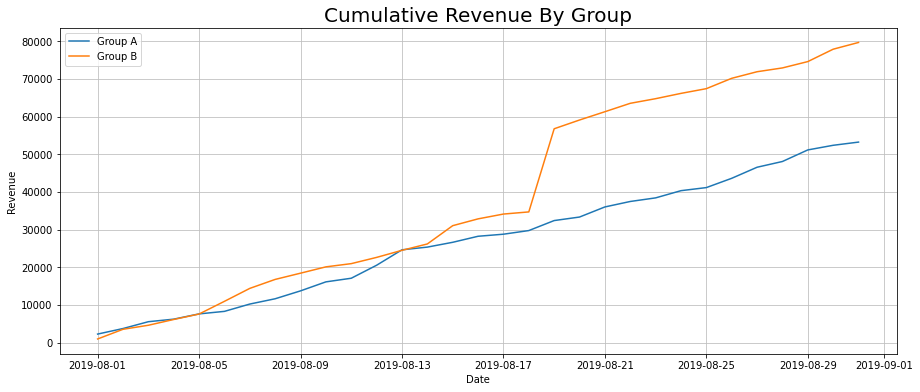

In [16]:
#Plot a graph
plt.figure(figsize=(15,6))
sns.lineplot(data=cum_rev_a, x='date', y='revenue', label='Group A')
sns.lineplot(data=cum_rev_b,x='date', y='revenue',label='Group B')
sns.set(style='darkgrid')
plt.title('Cumulative Revenue By Group', fontsize=20)
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(color='.75')
plt.show()

> Revenue is increasing steadily throughout the whole test. **Group B's** cumulative revenue is higher than **Group A** and we can see a surge on 08/19. This could be either in increase in orders or buyers had expensive orders.

##### Cumulative Average Order Size by Group

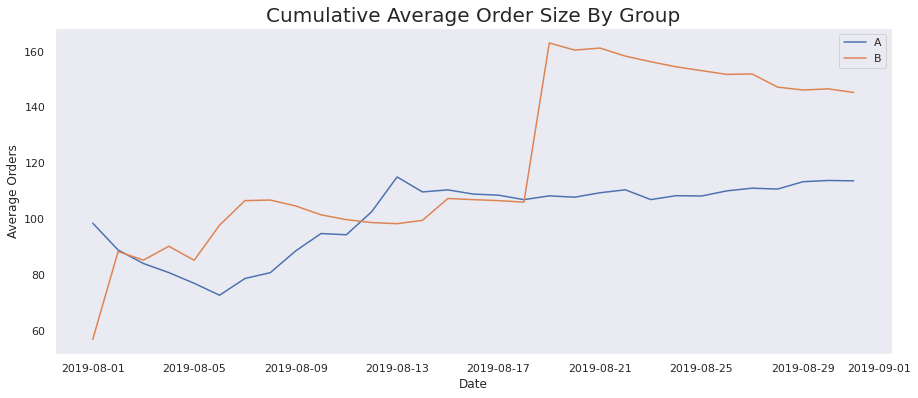

In [17]:
#Plot graph for cumulative orde size by each group
plt.figure(figsize=(15,6))
plt.plot(cum_rev_a['date'], cum_rev_a['revenue']/cum_rev_a['orders'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue']/cum_rev_b['orders'], label='B')
#sns.set(style='darkgrid')
plt.title('Cumulative Average Order Size By Group', fontsize=20)
plt.ylabel('Average Orders')
plt.xlabel('Date')
plt.legend()
plt.grid(color='.75')
plt.show()

> As we can see, the average order size is higher in Group B. There was a sharp rise in orders  for Group B on 8/19 and from there continues to slowly drop. The sharp rise in Group B could be either from large orders or buyers had more expensive orders. Group A's order size is lower for the most part of the test but it did stabilized by the end of the test.

##### Relative Difference in Average Order Size

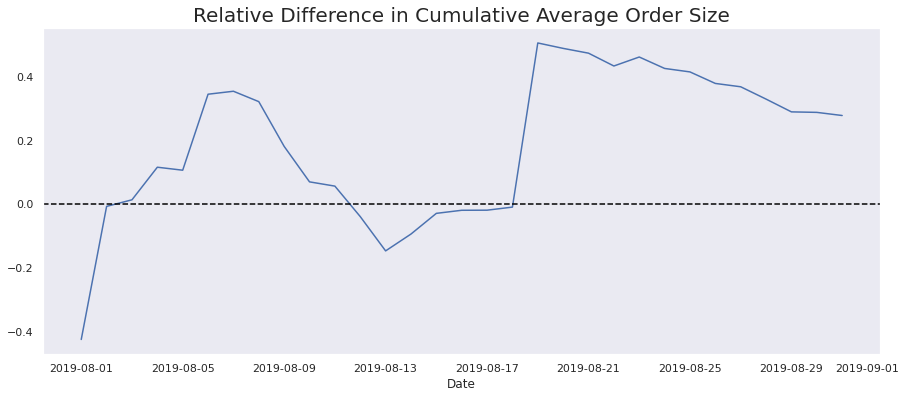

In [18]:
#Combining the data into one dataframe
merge_cum_rev = cum_rev_a.merge(cum_rev_b,
                                left_on='date',
                                right_on='date', 
                                how='left', 
                                suffixes=['A','B'])

#Plot relative difference
plt.figure(figsize=(15,6))
plt.plot(merge_cum_rev['date'],(merge_cum_rev['revenueB']/merge_cum_rev['ordersB'])\
         /(merge_cum_rev['revenueA']/merge_cum_rev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference in Cumulative Average Order Size', fontsize=20)
#plt.ylabel('Average Orders')
plt.grid(color='.75')
plt.xlabel('Date')
plt.show()

> At several points, the difference between the group spikes. This means there must be some large orders and outliers.

##### Conversion Rate

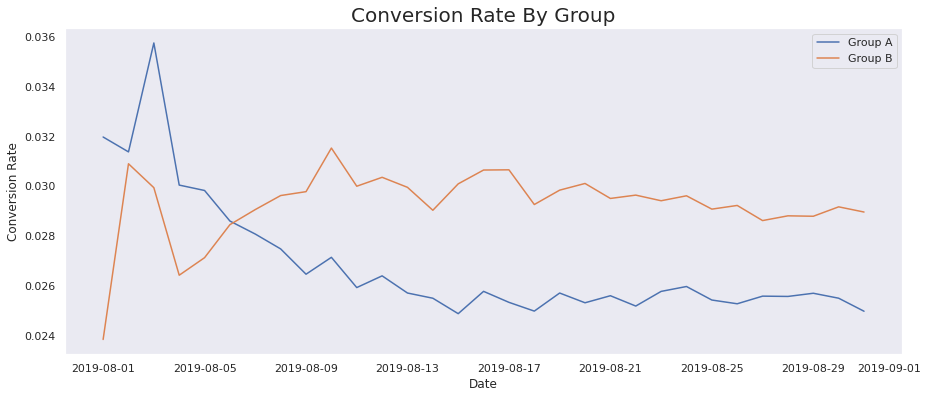

In [19]:
#Calculate cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

#Select group data
cumulative_data_A = cumulative_data[cumulative_data['group']== 'A']
cumulative_data_B = cumulative_data[cumulative_data['group']== 'B']

#Plot the graph
plt.figure(figsize=(15,6))
sns.lineplot(data=cumulative_data_A, x='date', y='conversion', label='Group A')
sns.lineplot(data=cumulative_data_B, x='date', y='conversion',label='Group B')
sns.set(style='darkgrid')
plt.title('Conversion Rate By Group', fontsize=20)
plt.ylabel('Conversion Rate')
plt.grid(color='.75')
plt.xlabel('Date')
plt.show()

> The graph shows that at the beginning of the test,Group B was behind but eventually caught up to Group A  and took the lead. By the end, both conversion rates have stabilized.

##### Number of orders per user and  calculate  95th and 99th percentile

In [20]:
#Find the number of order per user
order_per_user = orders_filtered.groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})
order_per_user.columns = ['visitorId', 'orders']

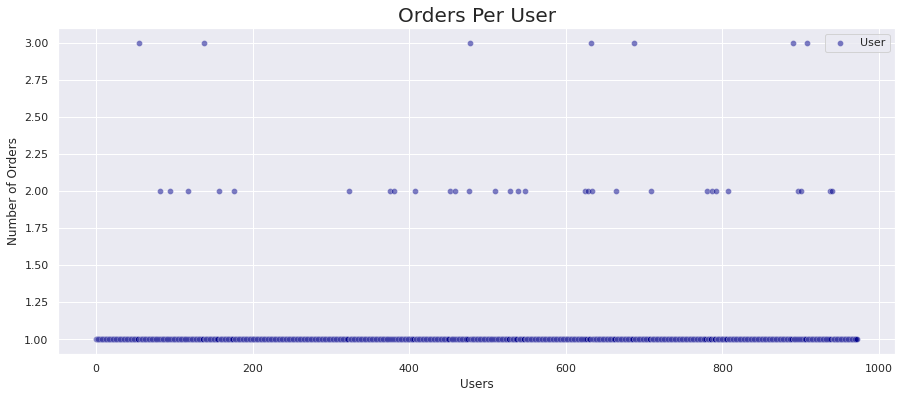

In [21]:
#Plot scatter plot of the numbers of order per user
plt.figure(figsize=(15,6))
color = 'darkblue'
sns.scatterplot(data=order_per_user,
                x=range(0,len(order_per_user)),
                y='orders', label='User', 
                color='darkblue',
                alpha=.50)
sns.set(style='darkgrid')
#plt.axhline(color=color)
plt.title('Orders Per User', fontsize=20)
plt.ylabel('Number of Orders')
plt.xlabel('Users')
plt.show()

In [22]:
#Calculate order per user
display(order_per_user['orders'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

#Calculate 95th and 99th percentile
print(np.percentile(order_per_user['orders'], [95,99]))

1    96.3%
2    3.0% 
3    0.7% 
Name: orders, dtype: object

[1. 2.]


> Most users only placed 1 order about 96.3%. There are few users who placed 2 orders and even fewer users who had 3 orders. Based on our calculation:
> - Not more than 5% users placed more than 1 order
> - Not more than 1% placed more than 2 orders
> - It would make sense to set the lower limit to **1 order per user** for the number of orders to filter out anomalies

##### Order prices and calculate  95th and 99th percentile

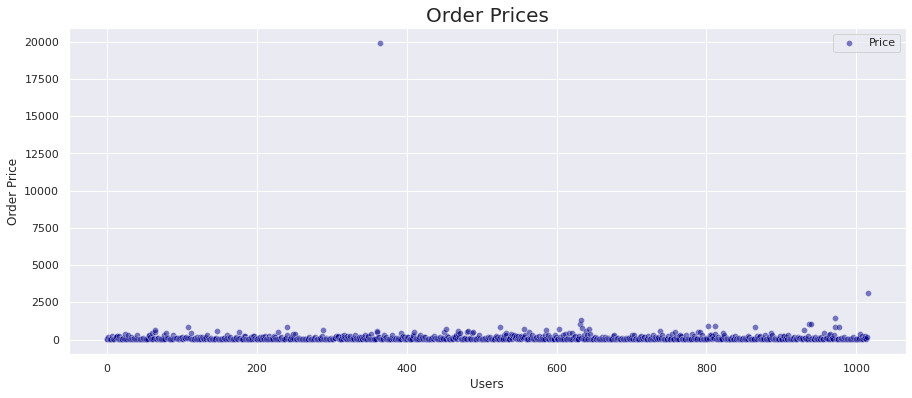

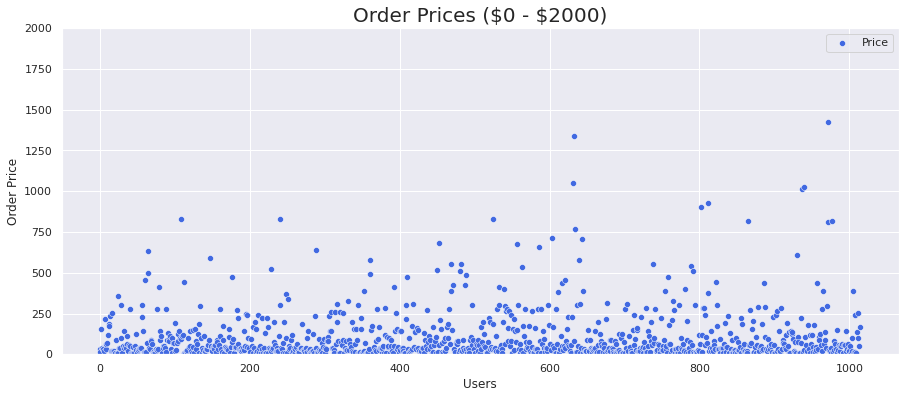

In [23]:
#Plot order prices 
plt.figure(figsize=(15,6))
sns.scatterplot(data=orders_filtered, x= range(0,len(orders_filtered)),
                y='revenue', 
                label='Price',
                color='darkblue',
                alpha=.50)
sns.set(style='darkgrid')
plt.title('Order Prices', fontsize=20)
plt.ylabel('Order Price')
plt.xlabel('Users')
plt.show()

#Plot order prices with range of 0-2000
plt.figure(figsize=(15,6))
sns.scatterplot(data=orders_filtered, x= range(0,len(orders_filtered)),
                y='revenue', 
                label='Price', 
                color='royalblue')
sns.set(style='darkgrid')
plt.title('Order Prices (\$0 - \$2000)',fontsize=20)
plt.ylabel('Order Price')
plt.xlabel('Users')
plt.ylim(0,2000)
plt.show()


In [24]:
orders_filtered[orders_filtered['revenue']>15000]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


> As predicted,there are a few large orders. The sudden rise on orders on 8/19 was the one order of 19920 which is definitely an outlier. Most of the orders falls below $500.

In [178]:
#Calculate 95th and 99th percentile
print(np.percentile(orders_filtered['revenue'], [95,99]))

[414.275 830.3  ]


> - Not more than 5% of users placed more than **\$414**
> - Not more than 1% of users placed more than **\$830**
> - Based on this, we can determine the point at which the value becomes an anomaly when the revenue is **greater than $500** per order

##### Find the statistical significance of the difference in conversion between the groups using raw data

> - **$H_{0}$** -Null Hypothesis- There is no statistically significant difference in conversion between the two groups
> - **$H_{1}$** -Alternative Hypothesis- There is a statistically significant difference in conversion between the two groups
> - alpha = .05 - if the p-value is less than alpha, we reject the hypothesis
> - **Mann Whitney Test** - to test the hypotheses

In [179]:
#Create the table user per order for each group
orders_by_A = orders_filtered[orders_filtered['group']=='A']\
                            .groupby('visitorId', as_index=False)\
                            .agg({'transactionId' :'nunique'})
orders_by_A.columns = ['userId', 'orders']

orders_by_B = orders_filtered[orders_filtered['group']=='B']\
                            .groupby('visitorId', as_index=False)\
                            .agg({'transactionId' : 'nunique'})
orders_by_B.columns = ['userId', 'orders'] 

#Create variables with users from different groups and corresponding numbers of orders
sampleA = pd.concat([orders_by_A['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                        - len(orders_by_A['orders'])),
                        name='orders')],axis=0)

sampleB = pd.concat([orders_by_B['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                        - len(orders_by_B['orders'])),
                        name='orders')],axis=0)

#Mann Whitney test
print("P_value: {0:.4f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("The relative conversion gain by Group B compared with Group A is {0:.0f}%".format((sampleB.mean()\
                                                                                          /sampleA.mean()-1)*100))

P_value: 0.0055
The relative conversion gain by Group B compared with Group A is 16%


>  The p value of **0.0055** is less than the alpha level of 0.05 which means we can reject the null hypothesis. The raw data analysis showed that the groups' conversion rate have statistically significant difference. The relative conversion gain by Group B compared with Group A is **16%**

##### Find the statistical ignificance of the difference in average order size between the groups using the raw data

> - **$H_{0}$** -Null Hypothesis- The average order size is equal for both groups
> - **$H_{1}$** -Alternative Hypothesis- The average order size is different for both groups
> - alpha = .05 - if the p-value is less than alpha, we reject the hypothesis
> - **Mann Whitney Test** - to test the hypotheses

In [180]:
print('P_value: {0:.4f}'.format(st.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'],
                                                orders_filtered[orders_filtered['group']=='B']['revenue'])[1]))
print('The relative difference is {0:.0f}%'.format((orders_filtered[orders_filtered['group']=='B']['revenue'].mean()
                                                    /orders_filtered[orders_filtered['group']=='A']['revenue'].mean()\
                                                    -1)*100))

P_value: 0.4311
The relative difference is 28%


> The p value of **0.4311** is greater than .05 which means we cannot reject the null hypothesis and conclude that average order size differs between the groups. The relative difference is **28%**.

##### Find the statistical significance of the difference in conversion between the groups using the filtered data

In [189]:
#Create the table for users who purchased more than 1
order_limit = 1
users_with_many_orders = pd.concat([orders_by_A[orders_by_A['orders'] > order_limit]['userId'],
                                    orders_by_B[orders_by_B['orders'] > order_limit]['userId']], axis = 0)

#Create a table for users who had an order more than $500
order_size_limit = 500
users_with_expensive_orders = orders_filtered[orders_filtered['revenue'] > order_size_limit]['visitorId']
abnormal_users = pd.concat([users_with_many_orders,
                            users_with_expensive_orders], 
                           axis = 0).drop_duplicates().sort_values()
print('There are {:} anomalous visitors in total'.format(len(abnormal_users)))

There are 72 anomalous visitors in total


 > As per previous findings, orders more than 1 per user and orders greater than \$500 are considered an anomaly. Let's try to find out how much different removing these anomalies can affect our result. 

In [196]:
#Create the filtered samples for the test
sampleA_filtered = pd.concat([orders_by_A[np.logical_not(orders_by_A['userId'].isin(abnormal_users))]['orders'],
                              pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                           - len(orders_by_A['orders'])),
                                        name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_by_B[np.logical_not(orders_by_B['userId'].isin(abnormal_users))]['orders'],
                              pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                           - len(orders_by_B['orders'])),
                                        name='orders')],axis=0)

> - **$H_{0}$** -Null Hypothesis- There is no statistically significant difference in conversion between the two groups
> - **$H_{1}$** -Alternative Hypothesis- There is a statistically significant difference in conversion between the two groups
> - alpha = .05 - if the p-value is less than alpha, we reject the hypothesis
> - **Mann Whitney Test** - to test the hypotheses

In [200]:
print("{0:.4f}".format(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("The relative conversion gain by Group B compared with Group A is {0:.0f}%"
      .format((sampleB_filtered.mean()/sampleA_filtered.mean()-1)*100))

0.0048
The relative conversion gain by Group B compared with Group A is 19%


> The p value of **0.0048** is less than the alpha level of 0.05 which means we can reject the null hypothesis. The filtered data analysis showed that the groups'conversion rate have statistically significant difference. The relative conversion gain by Group B compared with Group A is **19%**. This results determined that anomalous users did not really affect the test result and removing them did not make a significant difference.

##### Find the statistical significance of the difference in average order size between the groups using the filtered data

> - **$H_{0}$** -Null Hypothesis- The average order size is equal for both groups
> - **$H_{1}$** -Alternative Hypothesis- The average order size is different for both groups
> - alpha = .05 - if the p-value is less than alpha, we reject the hypothesis
> - Use the **Mann Whitney Test**, to test the hypotheses

In [198]:
#Create a slice for order size for each group
revenueA_filtered = (
    orders_filtered[(np.logical_not(orders_filtered['visitorId'].
                                   isin(abnormal_users)))                
                   & (orders_filtered['group'] == 'A')])['revenue']
revenueB_filtered = (
    orders_filtered[(np.logical_not(orders_filtered['visitorId'].
                                   isin(abnormal_users)))                
                   & (orders_filtered['group'] == 'B')])['revenue']

In [199]:
print("P-value : {0:.3f}"
      .format(st.mannwhitneyu(revenueA_filtered, revenueB_filtered)[1]))
print("Average order size in group B is better by {0:.0f}%"
      .format((revenueB_filtered.mean()/revenueA_filtered.mean()-1)*100))

P-value : 0.496
Average order size in group B is better by 2%


> The p value of **0.496** is greater than .05 which means we cannot reject the null hypothesis. The relative difference is **2%**. The average order size for group B is the same as for group A on the filtered data. The average order size does not change without the anomalous data.

##### Conclusion

After conducting A/B tests, we found that:
- There are statistically significant differences in conversion between groups A and B - both for raw data and for filtered data
-  There are no statistically significant differences in the average order size between groups A and B - both for raw data and for filtered data

On average, the number of orders for Group B is statistically significantly higher than Group A while the order size does not differ. The relative conversion gain by Group B compared with Group A is between 16%-19% for both tests. Based on these results, we can advise that the test is successful and should be stopped.  We can recommend to marketing department that we should invest more in Group B as it will generate higher revenue than Group A.


## Overall Conclusion

At first we had to prioritize hypotheses and the top priority for each framework:
- **RICE - hypothesis 7**- adding a subscription form should be prioritized - highest reach score
- **ICE - hypothesis 8**- launching birthday discounts should be prioritized - lowest reach score

In comparison to both framework, ***Hypothesis 7*** (adding a subscription) and ***hypothesis 2*** (adding product recommendation blocks) moved up mainly because they have a broader reach than the other hypotheses. ***Hypothesis 8*** (launch birthday discounts promotion) which was the top one under Ice framework,sunk to fifth place due to small reach.  This makes sense since it can only be used once a year for each user. The difference between ICE and RICE frameworks is the reach parameter. This parameter adds another factor to the framework, making RICE scores higher than ICE scores. Reach is an important factor to consider. Adding a subscription had been very consistent with high level of reach, impact and confidence with a median level of effort.

For our second dataset, we had conduct and analyze A/B test and these are our results:
 - There are statistically significant differences in conversion between groups A and B - both for raw data and for filtered data
 -  There are no statistically significant differences in the average order size between groups A and B - both for raw data and for filtered data

We considered the test to be a success and should be stopped because we concluded that **Group B** is better and will generate more revenue compare to **Group A**. 

